<a href="https://colab.research.google.com/github/HenriqueCCdA/bootCampAluraDataScience/blob/master/modulo5/desafios/Aula1_desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Pre-Analise

## 1.1) Download da minhas funções

In [2]:
!wget https://raw.githubusercontent.com/HenriqueCCdA/bootCampAluraDataScience/master/modulo5/src/limpeza_dos_dados.py
!wget https://raw.githubusercontent.com/HenriqueCCdA/bootCampAluraDataScience/master/modulo5/src/curva_roc.py

--2021-07-26 04:02:41--  https://raw.githubusercontent.com/HenriqueCCdA/bootCampAluraDataScience/master/modulo5/src/limpeza_dos_dados.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1103 (1.1K) [text/plain]
Saving to: ‘limpeza_dos_dados.py’

limpeza_dos_dados.p 100%[===================>]   1.08K  --.-KB/s    in 0s      

2021-07-26 04:02:41 (32.7 MB/s) - ‘limpeza_dos_dados.py’ saved [1103/1103]

--2021-07-26 04:02:41--  https://raw.githubusercontent.com/HenriqueCCdA/bootCampAluraDataScience/master/modulo5/src/curva_roc.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request

## 1.2) importando os modulos

In [3]:
import pandas as pd
import numpy as np
import limpeza_dos_dados as cl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
dados = pd.read_excel("https://github.com/HenriqueCCdA/bootCampAluraDataScience/blob/master/modulo5/dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")
dados_limpos = cl.limpando_dados(dados)
dados_limpos.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.935113,-0.935113,...,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0

#2) Desafios

##2.1) Desafio 01: Transformar a coluna AGE_PERCENTIL em dados categóricos, mas utilizando outro método.

In [5]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

dados_limpos['AGE_PERCENTIL_LABEL'] = le.fit_transform(dados_limpos.AGE_PERCENTIL)

In [6]:
conjunto = {}

for antigo, novo in zip(dados_limpos['AGE_PERCENTIL'] , dados_limpos['AGE_PERCENTIL_LABEL']):
  conjunto[antigo] = novo

In [7]:
conjunto

{'10th': 0,
 '20th': 1,
 '30th': 2,
 '40th': 3,
 '50th': 4,
 '60th': 5,
 '70th': 6,
 '80th': 7,
 '90th': 8,
 'Above 90th': 9}

## 2.2) Desafio 04: Pesquisar e plotar a arvore de decisão criada pelo modelo.

In [8]:
dados = pd.read_excel("https://github.com/HenriqueCCdA/bootCampAluraDataScience/blob/master/modulo5/dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")
dados_limpos = cl.limpando_dados(dados)
le = preprocessing.LabelEncoder()
dados_limpos['AGE_PERCENTIL'] = le.fit_transform(dados_limpos.AGE_PERCENTIL)

In [9]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(73246)

x_columns = dados.columns
y = dados_limpos["ICU"]
x = dados_limpos[x_columns].drop(["ICU","WINDOW"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

modelo_arvore = DecisionTreeClassifier(max_depth=3)

modelo_arvore.fit(x_train, y_train)

predicao_arvore = modelo_arvore.predict(x_test)

accuracy_score(y_test, predicao_arvore)

0.6363636363636364

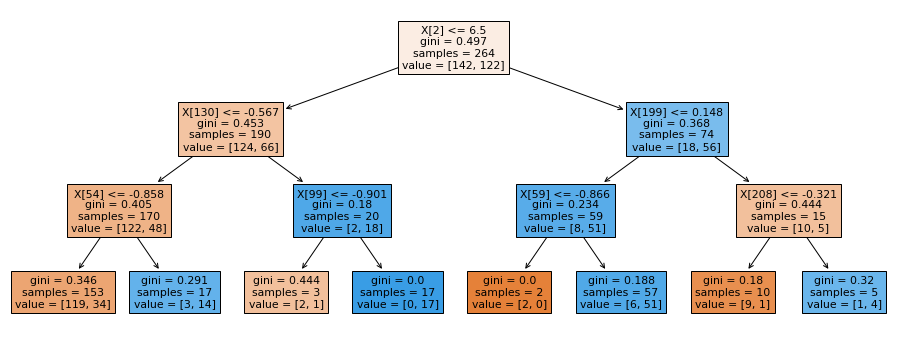

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.subplots(figsize=(16,6))
ax = tree.plot_tree(modelo_arvore, filled=True)

plt.show()

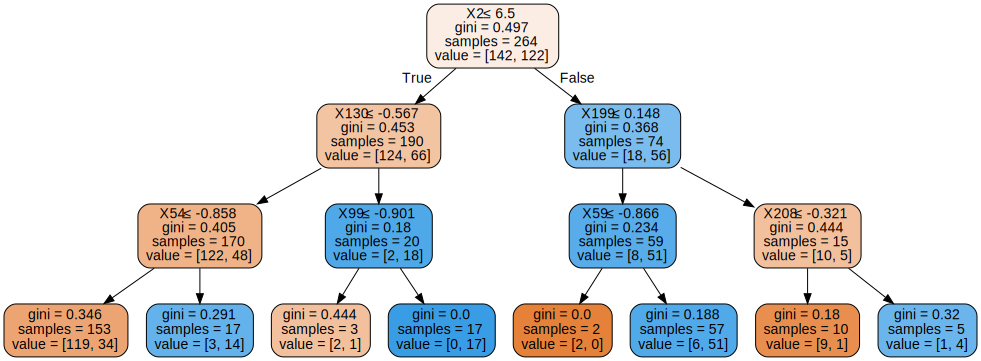

In [11]:
import graphviz 

dot_data = tree.export_graphviz(modelo_arvore, 
                                out_file=None,
                                filled=True, 
                                rounded=True,  
                                special_characters=True) 

graph = graphviz.Source(dot_data) 
graph

##2.3) Desafio 05: Criar uma função que gere a curva ROC.

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

np.random.seed(73246)

x_columns = dados.columns
y = dados_limpos["ICU"]
x = dados_limpos[x_columns].drop(["ICU","WINDOW"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)


# Arvore
modelo_arvore = DecisionTreeClassifier()
modelo_arvore.fit(x_train, y_train)
prob_arvore = modelo_arvore.predict_proba(x_test)

#Logistic
modelo_lg = LogisticRegression(max_iter=10000)
modelo_lg.fit(x_train, y_train)
prob_lg =modelo_lg.predict_proba(x_test)

* Usando roc_curve 

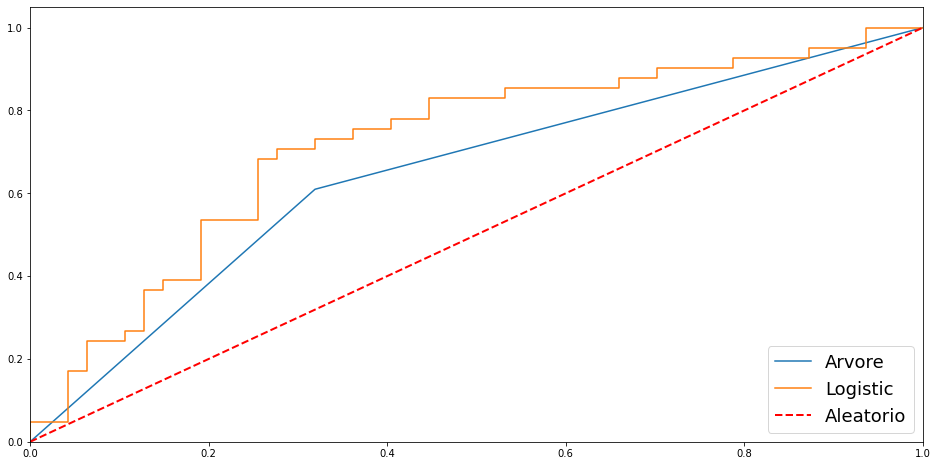

In [13]:
from sklearn.metrics import roc_curve

fig, ax = plt.subplots(figsize=(16,8))

arvore_fpr, arvore_tpr, thresholds = roc_curve(y_test, prob_arvore[:,1])
lg_fpr, lg_tpr, thresholds = roc_curve(y_test, prob_lg[:,1])

ax.plot(arvore_fpr, arvore_tpr, label="Arvore")
ax.plot(lg_fpr, lg_tpr, label="Logistic")
ax.plot([0, 1], [0, 1], color = "red" , ls = '--', lw = 2, label = 'Aleatorio')
ax.legend(loc="lower right",fontsize=18)

ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.05)
plt.show()

* Usando plot_roc_curve

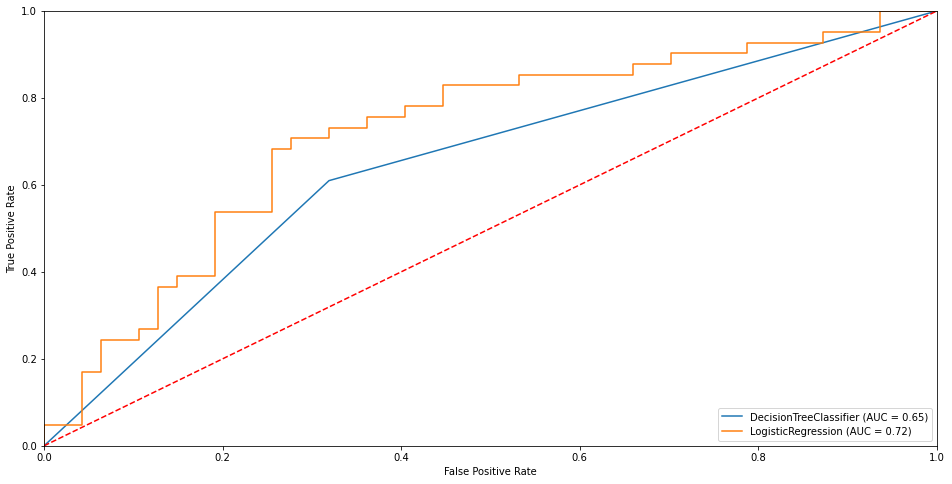

In [14]:
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots(figsize=(16,8))

plot_roc_curve(modelo_arvore, x_test, y_test, ax = ax) 
plot_roc_curve(modelo_lg, x_test, y_test, ax = ax) 
ax.plot([0, 1], [0, 1], color = "red", ls ='--')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()

* Usando a funcção roc que eu desenvolvi 

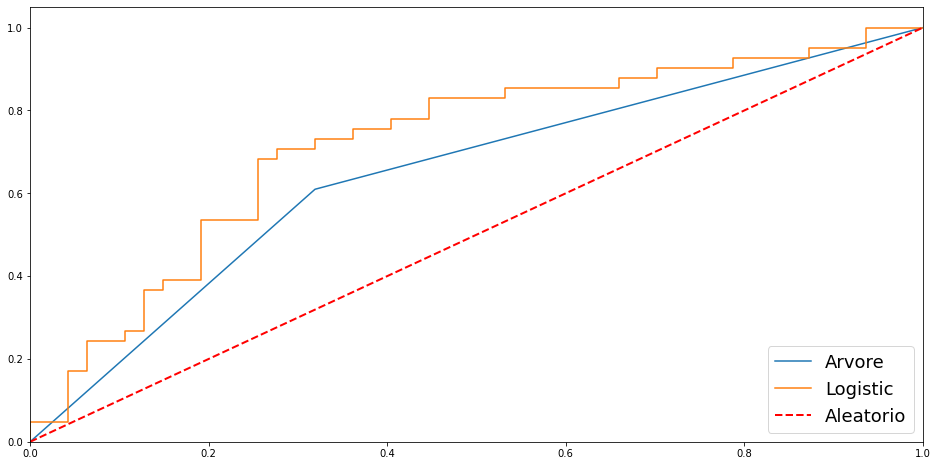

In [15]:
import curva_roc as cr

fig, ax = plt.subplots(figsize=(16,8))

m_arvore_fpr, m_arvore_tpr, _ = cr.curva_roc(y_test, prob_arvore[:,1])
m_lg_fpr, m_lg_tpr, _ = cr.curva_roc(y_test, prob_lg[:,1])

ax.plot(m_arvore_fpr, m_arvore_tpr, label="Arvore")
ax.plot(m_lg_fpr, m_lg_tpr, label="Logistic")
ax.plot([0, 1], [0, 1], color = "red" , ls = '--', lw = 2, label = 'Aleatorio')
ax.legend(loc="lower right",fontsize=18)

ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.05)
plt.show()

### Compararando a roc do sklearn com a minha

A minha roc precisa de muitos mais thresholds para se aproximar da roc do sklearn.


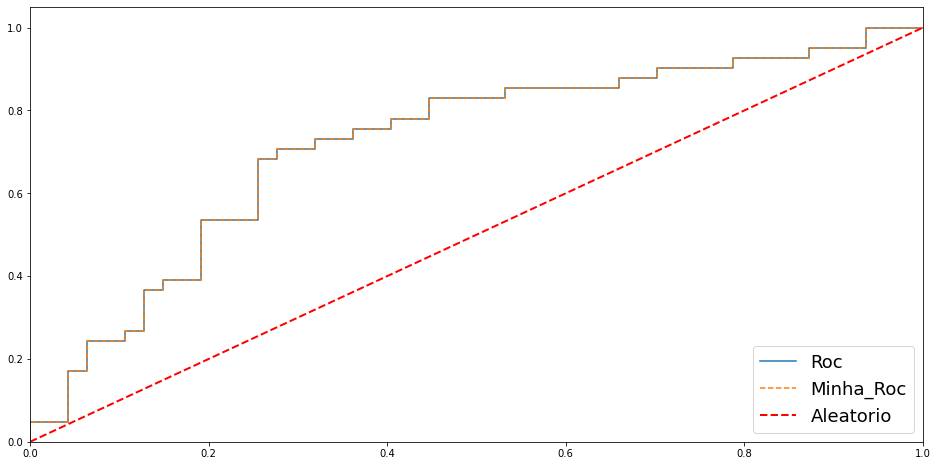

In [16]:
fig, ax = plt.subplots(figsize=(16,8))


ax.plot(lg_fpr, lg_tpr, label="Roc")
ax.plot(m_lg_fpr , m_lg_tpr, ls='--', label="Minha_Roc")
ax.plot([0, 1], [0, 1], color = "red" , ls = '--', lw = 2, label = 'Aleatorio')
ax.legend(loc="lower right",fontsize=18)

ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.05)
plt.show()